In [142]:

import numpy as np
import matplotlib.pyplot as plt
import gstools as gs
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.cluster import KMeans
import pandas as pd



In [143]:
# dimensionxy=50
# x = np.linspace(0, 50, 50)
# y = np.linspace(0, 50, 50)
# XX, YY = np.meshgrid(x, y)


# model = gs.Gaussian(dim=2, var=1,len_scale=6)
dimensionxy=25

# 生成数据
x = np.linspace(0, 25, 25)
y = np.linspace(0, 25, 25)
XX, YY = np.meshgrid(x, y)

# 第一个数据
model = gs.Gaussian(dim=2, var=1, len_scale=3)
srf = gs.SRF(model,mean=0.)
srf((x, y), mesh_type='structured')
B0=srf((x, y), mesh_type='structured',seed=100)




In [144]:
# 定义状态数
n_states = 5
est = KBinsDiscretizer(n_bins=n_states, encode='ordinal', strategy='uniform')
B_discretized = est.fit_transform(B0)

def process_data_with_randomness(B_discretized):
    # 构建转移概率矩阵
    transition_matrix = np.zeros((n_states, n_states))

    for month in range(24):  # 24次状态转移
        for day in range(25):
            current_state = int(B_discretized[month, day])
            next_state = int(B_discretized[month + 1, day])
            transition_matrix[current_state, next_state] += 1

    # 归一化转移概率矩阵
    transition_matrix /= transition_matrix.sum(axis=1, keepdims=True)

    # 使用马尔可夫链预测第26个月的状态
    last_month_states = B_discretized[-1, :]
    predicted_states = []

    for state in last_month_states:
        predicted_state = np.random.choice(np.arange(n_states), p=transition_matrix[int(state)])
        predicted_states.append(predicted_state)

    print(predicted_states)
    return predicted_states
    # 预测值从状态返回到实际值范围
    # B26_pred = est.inverse_transform([predicted_states])
    # # 将 B26_pred 的数据格式调整为适合 KMeans 聚类的格式
    # B26_pred = B26_pred.flatten().reshape(-1, 1)

    # return B26_pred.flatten()

def calcuCirculation(time):
    all_processed_values=[]
    results_df= pd.DataFrame()

    if time==2:
        for i in range(1, time):
            processed_values = process_data_with_randomness(B_discretized)
            all_processed_values.append(pd.Series(processed_values, name=f'Out0'))
        results_df = pd.concat(all_processed_values, axis=1)
        results_df.to_csv("initial-out/pred_nonoisy_initial.csv", index=False)
    else:
        for i in range(1, time):
            processed_values = process_data_with_randomness(B_discretized)
            all_processed_values.append(pd.Series(processed_values, name=f'Out{i}'))
        results_df = pd.concat(all_processed_values, axis=1)
        results_df.to_csv("repro-out/pred_nonoisy.csv", index=False)
        # 检查结果
        print(results_df)


times=1001
calcuCirculation(2)
calcuCirculation(times)



[4, 2, 4, 4, 2, 2, 0, 1, 0, 1, 1, 2, 1, 2, 1, 4, 3, 2, 2, 3, 1, 2, 4, 4, 4]
[4, 4, 2, 4, 4, 1, 0, 1, 0, 0, 1, 2, 2, 1, 2, 3, 4, 2, 3, 2, 1, 4, 4, 2, 4]
[3, 2, 4, 4, 3, 3, 2, 2, 1, 0, 2, 1, 2, 4, 2, 3, 4, 3, 3, 3, 1, 1, 3, 2, 4]
[2, 4, 4, 4, 4, 3, 1, 2, 1, 3, 1, 3, 2, 3, 2, 3, 4, 4, 2, 1, 2, 3, 4, 4, 4]
[3, 4, 4, 3, 3, 2, 0, 2, 1, 0, 2, 1, 1, 1, 2, 2, 4, 2, 4, 3, 2, 2, 4, 4, 2]
[4, 4, 4, 4, 2, 2, 0, 0, 1, 0, 1, 1, 3, 1, 2, 2, 4, 4, 3, 1, 1, 2, 4, 4, 4]
[2, 4, 4, 4, 3, 3, 0, 2, 0, 2, 3, 2, 1, 2, 2, 4, 3, 3, 3, 1, 2, 3, 3, 3, 2]
[4, 4, 2, 4, 3, 2, 1, 1, 1, 3, 2, 1, 2, 1, 1, 2, 4, 4, 4, 3, 3, 2, 4, 3, 4]
[4, 4, 4, 4, 3, 1, 1, 2, 0, 3, 2, 1, 1, 1, 1, 1, 4, 4, 4, 4, 2, 4, 4, 4, 4]
[4, 4, 4, 3, 3, 2, 2, 1, 0, 1, 4, 3, 1, 1, 3, 3, 4, 4, 1, 3, 2, 2, 4, 4, 2]
[4, 3, 4, 4, 2, 1, 1, 2, 1, 3, 4, 2, 4, 2, 3, 4, 4, 4, 2, 2, 1, 4, 4, 3, 3]
[3, 4, 2, 4, 2, 1, 0, 0, 0, 1, 0, 2, 2, 3, 2, 1, 4, 3, 3, 1, 1, 3, 4, 4, 4]
[3, 4, 4, 4, 3, 3, 0, 1, 0, 1, 4, 2, 2, 3, 2, 4, 4, 4, 1, 2, 1, 2, 4, 4, 4]
[4, 4, 4, 4,

In [145]:

df = pd.read_csv("./repro-out/pred_nonoisy.csv")

df2=pd.read_csv("./initial-out/pred_nonoisy_initial.csv")

out0 = df["Out0"]=df2["Out0"]
# df["value0"]=df2["value0"]
x= df.index
data = df.copy()
            

In [146]:
# 筛选data_repro中包含新列的部分
filtered_data_repro = data[[f'Out{i}' for i in range(1, times)]]
filtered_data_initial = data[[f'Out0']]

relative_frequency=[]

# 创建频率分布图的函数
def plot_histogram(row_data, row_index):
    initial_value=filtered_data_initial.loc[row_index,:].values[0]
    unique, counts = np.unique(row_data, return_counts=True)
    frequencies = dict(zip(unique, counts))
    # print(frequencies)
    
    categories = [0,1, 2, 3, 4]
    frequency_values = [frequencies.get(category, 0) for category in categories]
    print(frequency_values)
    # 确定initial_value所在的类别及其频率
    initial_category = int(initial_value)
    initial_frequency = frequencies.get(initial_category, 0)
    relative_frequency.append(initial_frequency / len(row_data)) 
    # print(initial_relative_frequency)

    # plt.figure(figsize=(10, 6))
    # plt.bar(categories, frequency_values, tick_label=categories,alpha=0.3,label="Reproduced values")
    # plt.title(f'Frequency Distribution of Row {row_index} \n The probability of reproducbility is {initial_frequency / len(row_data) *100}%')
    # plt.axvline(x=initial_category, color='red', linestyle='dashed', linewidth=2, label=f'Initial value: {initial_value}')
    # plt.legend()
    # plt.xlabel('Category')
    # plt.ylabel('Frequency')
    # plt.ylim(0, max(frequency_values) + 10)  # Adjust ylim for better visualization
    # plt.show()

# 为每一行绘制直方图 filtered_data_repro.shape[0]
# print(filtered_data_repro.loc[0,:])
# data2 = pd.read_csv('repro-out/filtered_data_repro.csv')
# filtered_data_repro= data2.iloc[:,1:1001]
# print(filtered_data_repro)
for i in range(1,filtered_data_repro.shape[0]):
    plot_histogram(filtered_data_repro.loc[i,:], i)

# 计算initial_relative_frequency数组的期望（均值）
expected_value = np.mean(relative_frequency)
print("Expected Value of Initial Relative Frequencies:", expected_value)


[0, 0, 78, 213, 709]
[0, 0, 89, 206, 705]
[0, 0, 76, 199, 725]
[0, 120, 286, 243, 351]
[53, 311, 299, 270, 67]
[219, 476, 243, 62, 0]
[238, 456, 240, 66, 0]
[702, 262, 18, 18, 0]
[237, 467, 238, 58, 0]
[51, 284, 303, 287, 75]
[49, 349, 291, 244, 67]
[47, 325, 291, 270, 67]
[55, 319, 292, 260, 74]
[53, 353, 266, 256, 72]
[0, 121, 289, 276, 314]
[0, 0, 89, 209, 702]
[0, 0, 75, 201, 724]
[0, 117, 293, 260, 330]
[58, 325, 281, 267, 69]
[275, 418, 237, 70, 0]
[0, 101, 305, 241, 353]
[0, 0, 84, 223, 693]
[0, 0, 94, 214, 692]
[0, 0, 86, 197, 717]
Expected Value of Initial Relative Frequencies: 0.394375


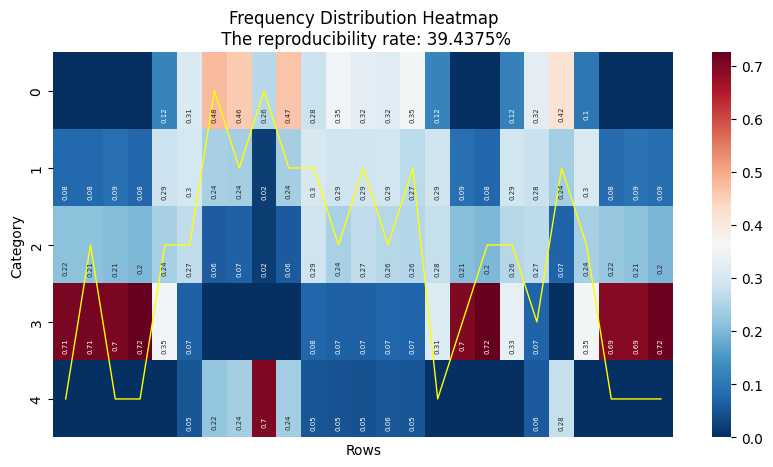

In [147]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 仅选择前20行的数据
number = filtered_data_repro.shape[0]
repro = filtered_data_repro.iloc[:number, :]
initial = filtered_data_initial.iloc[:number, :]
# repro = filtered_data_repro
# initial = filtered_data_initial

# 创建一个矩阵来存储频率分布
frequency_matrix = np.zeros((repro.shape[0], 5))

# 填充频率矩阵
for i in range(repro.shape[0]):
    row_data = repro.loc[i, :]
    unique, counts = np.unique(row_data, return_counts=True)
    frequencies = dict(zip(unique, counts))
    for category in [0,1, 2, 3, 4]:
        frequency_matrix[i, category - 1] = frequencies.get(category, 0) / len(row_data)

# 创建一个矩阵来存储注释（只显示值大于0的标签）
annotations = np.where(frequency_matrix > 0, np.round(frequency_matrix, 2), '')

# 绘制热力图
plt.figure(figsize=(10, 5))

ax = sns.heatmap(frequency_matrix.T, annot=annotations.T, fmt="", xticklabels=False, yticklabels=[0,1, 2, 3, 4], cmap="RdBu_r", cbar=True,
                 annot_kws={"size": 5, "ha": "center", "va": "center", "rotation": 90,"clip_on": True}) #cmap="viridis"

plt.title(f'Frequency Distribution Heatmap\n The reproducibility rate: {round(expected_value*100,4)}%')
plt.ylabel('Category')
plt.xlabel('Rows')

# 调整标签的位置
for text in ax.texts:
    text.set_y(float(text.get_position()[1]) + 0.3)

# 添加表示filtered_data_initial的线
initial_values = initial['Out0'].values - 1  # 将值转换为索引
plt.plot(np.arange(0.5, repro.shape[0] + 0.5), initial_values + 1.5, color='yellow', linewidth=1, label='Initial Value')
plt.savefig("repro-out/heatmap.svg")
plt.show()


计算 ARI 统计量:
原始结果与复现结果之间的ARI 95%置信区间: (-0.01174925558670462, 0.29555877856610874);随机误差范围: (-0.021848834480173787, 0.36658506731946144)
ARI置信区间覆盖率: 0.37；概率0.9626

计算 NMI 统计量:
原始结果与复现结果之间的NMI 95%置信区间: (0.2277675819703403, 0.5137677602268416);随机误差范围: (0.20883790341630237, 0.5157970609259785)
NMI置信区间覆盖率: 0.37；概率0.9498

计算 Kappa 统计量:
原始结果与复现结果之间的Kappa 95%置信区间: (0.028580094036005324, 0.4365042198866874);随机误差范围: (-0.010101010101010166, 0.4455673100994206)
Kappa置信区间覆盖率: 0.43；概率0.9425


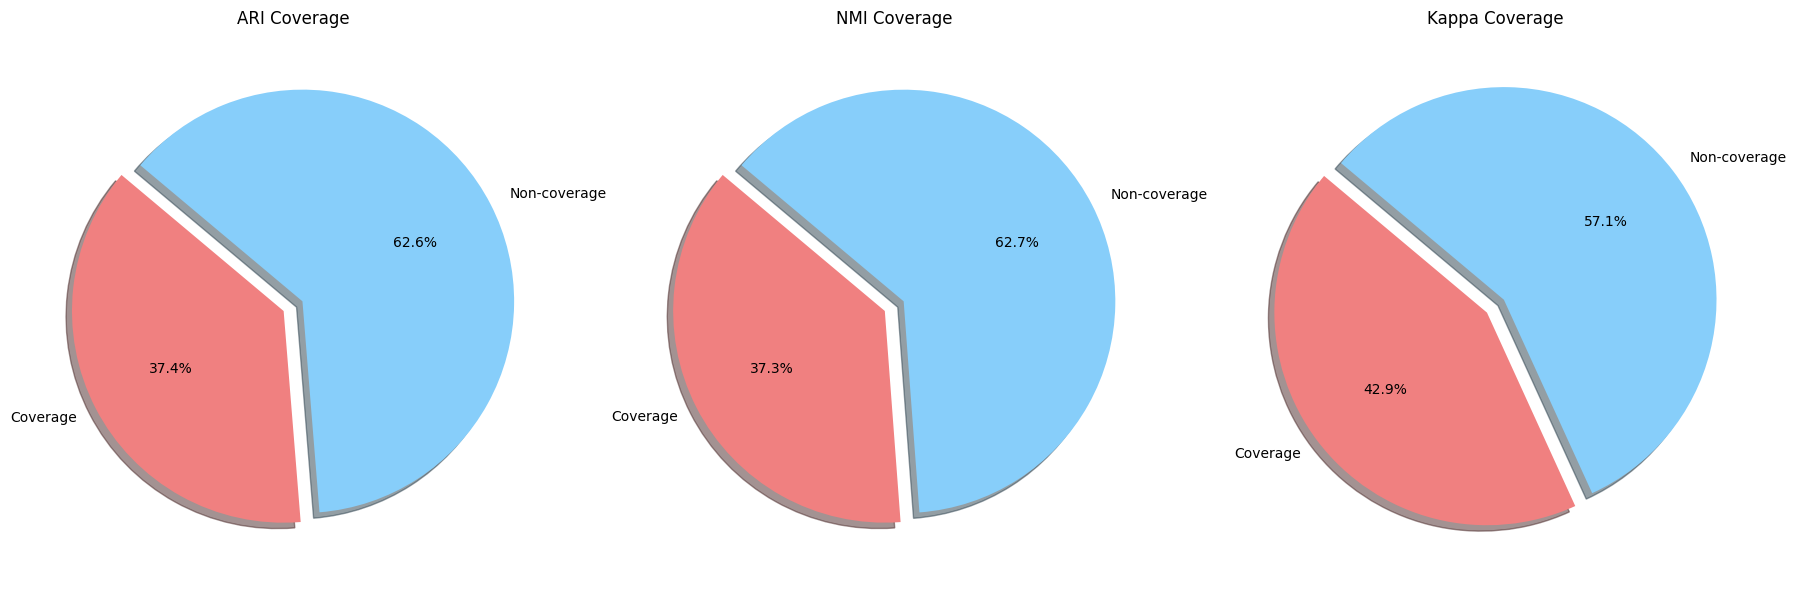

In [148]:
import numpy as np
import pandas as pd
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, cohen_kappa_score
from itertools import combinations
import scipy.stats as stats

# 设定随机种子以确保结果一致


# 计算置信区间
def calculate_confidence_interval(values, alpha=0.05):
    values = np.sort(values)
    lower_bound = np.percentile(values, alpha / 2 * 100)
    upper_bound = np.percentile(values, (1 - alpha / 2) * 100)
    return lower_bound, upper_bound

# 蒙特卡洛抽样并计算指定类型的统计量
def monteCarloMethod(num_samples, data, stat_type):
    monteCarlo_statistics_values = []
    sampled_combinations = [np.random.choice(data.columns, 2, replace=False) for _ in range(num_samples)]
    
    for comb in sampled_combinations:
        i, j = comb
        monteCarlo_statistics_values.append(calculate_statistic_values(data[i], data[j], stat_type))
    
    return monteCarlo_statistics_values



# 计算指定类型的统计量
def calculate_statistic_values(data1, data2, stat_type):
    if stat_type == "ARI":
        return adjusted_rand_score(data1, data2)
    elif stat_type == "NMI":
        return normalized_mutual_info_score(data1, data2)
    elif stat_type == "Kappa":
        return cohen_kappa_score(data1, data2)

# 计算覆盖率
def calculate_coverage(interval1, interval2):
    L1, U1 = interval1
    L2, U2 = interval2
    L_overlap = max(L1, L2)
    U_overlap = min(U1, U2)
    if L_overlap > U_overlap:
        return 0.0
    overlap_length = U_overlap - L_overlap
    length1 = U1 - L1
    coverage = overlap_length / length1
    return coverage
# def calculate_proportion(values, lower_bound, upper_bound):
#     # value
#     return np.sum((values >= lower_bound) & (values <= upper_bound)) / len(values)
def calculate_proportion(values, lower_bound, upper_bound):
    # 确保 values 是一个一维数组或列表
    values = np.asarray(values).flatten()
    
    common_count = 0
    total_count = len(values)
    for value in values:
        if lower_bound <= value <= upper_bound:
            common_count += 1
            
    return common_count / total_count

# 数据加载
data_df = pd.read_csv('repro-out/filtered_data.csv')
filtered_data_repro = data_df[[f'new_Out{i}' for i in range(1, 1001)]]
out0 = data_df['Out0']



df = pd.read_csv("./repro-out/pred_nonoisy.csv")
filtered_data_repro =df[[f'Out{i}' for i in range(1, 1001)]]
df2=pd.read_csv("./initial-out/pred_nonoisy_initial.csv")

out0 =df2["Out0"]            



# 定义要计算的统计量类型
stat_types = ["ARI", "NMI", "Kappa"]  # 可选值："ARI", "NMI", "Kappa"



# for stat_type in stat_types:
#     print(f"\n计算 {stat_type} 统计量:") 
#     # 计算原始结果与复现结果的指定统计量
#     real_values = [calculate_statistic_values(out0, filtered_data_repro[f'Out{i}'], stat_type) for i in range(1, 1001)]
#     # 计算置信区间-----总误差
#     ci_low, ci_high = calculate_confidence_interval(real_values)
#     # -----随机误差
#     monteCarlo_values = monteCarloMethod(10000, filtered_data_repro, stat_type)
#     ci_low_mc_random, ci_high_mc_random = calculate_confidence_interval(monteCarlo_values)
#     print(f"原始结果与复现结果之间的{stat_type} 95%置信区间: ({ci_low}, {ci_high});随机误差范围: ({ci_low_mc_random}, {ci_high_mc_random})")
#     # 计算覆盖率

#     ratio_original = calculate_proportion(monteCarlo_values, ci_low, 1)


#     coverage = calculate_coverage((ci_low, 1), (ci_low_mc_random, ci_high_mc_random))
#     print(f"{stat_type}置信区间覆盖率: {coverage:.2f}；概率{ratio_original}")
#     # 绘制覆盖率图

#      # 绘制覆盖率的饼图
#     fig, ax = plt.subplots()
#     labels = ['Coverage', 'Non-coverage']
#     sizes = [coverage, 1-coverage]
#     colors = ['lightcoral', 'lightskyblue']
#     explode = (0.1, 0)  # 突出显示覆盖率
#     ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
#            shadow=True, startangle=140)
#     ax.axis('equal')
#     plt.title(f'{stat_type} Coverage')
#     plt.show()


# 创建一个3x1的子图布局
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for idx, stat_type in enumerate(stat_types):
    print(f"\n计算 {stat_type} 统计量:") 
    # 计算原始结果与复现结果的指定统计量
    real_values = [calculate_statistic_values(out0, filtered_data_repro[f'Out{i}'], stat_type) for i in range(1, 1001)]
    # 计算置信区间-----总误差
    ci_low, ci_high = calculate_confidence_interval(real_values)
    # -----随机误差
    monteCarlo_values = monteCarloMethod(10000, filtered_data_repro, stat_type)
    ci_low_mc_random, ci_high_mc_random = calculate_confidence_interval(monteCarlo_values)
    print(f"原始结果与复现结果之间的{stat_type} 95%置信区间: ({ci_low}, {ci_high});随机误差范围: ({ci_low_mc_random}, {ci_high_mc_random})")
    # 计算覆盖率
    ratio_original = calculate_proportion(monteCarlo_values, ci_low, 1)
    coverage = calculate_coverage((ci_low, 1), (ci_low_mc_random, ci_high_mc_random))
    print(f"{stat_type}置信区间覆盖率: {coverage:.2f}；概率{ratio_original}")

    # 绘制覆盖率的饼图
    labels = ['Coverage', 'Non-coverage']
    sizes = [coverage, 1-coverage]
    colors = ['lightcoral', 'lightskyblue']
    explode = (0.1, 0)  # 突出显示覆盖率
    axs[idx].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
                 shadow=True, startangle=140)
    axs[idx].axis('equal')
    axs[idx].set_title(f'{stat_type} Coverage')

plt.tight_layout()
plt.show()



In [149]:
from sklearn.metrics import (
    adjusted_rand_score, 
    adjusted_mutual_info_score, 
    homogeneity_completeness_v_measure, 
    fowlkes_mallows_score, 
    jaccard_score
)

def calculate_clustering_similarity(true_labels, predicted_labels):
    similarity_measures = {
        "Adjusted Rand Index": adjusted_rand_score,
        "Adjusted Mutual Information": adjusted_mutual_info_score,
        "Homogeneity": lambda x, y: homogeneity_completeness_v_measure(x, y)[0],
        "Completeness": lambda x, y: homogeneity_completeness_v_measure(x, y)[1],
        "V-Measure": lambda x, y: homogeneity_completeness_v_measure(x, y)[2],
        "Fowlkes-Mallows Index": fowlkes_mallows_score,
        "Jaccard Index": lambda x, y: jaccard_score(
            [1 if label == 0 else 0 for label in x], 
            [1 if label == 0 else 0 for label in y]
        )  # Example for binary case, adjust accordingly for multi-class
    }
    
    results = {}
    for measure_name, measure_func in similarity_measures.items():
        results[measure_name] = measure_func(true_labels, predicted_labels)
    
    return results

# 示例聚类标签
labels_true = data["Out0"]
labels_pred = data["Out18"]

# 计算相似性
similarity_results = calculate_clustering_similarity(labels_true, labels_pred)

# 打印结果
for measure, result in similarity_results.items():
    print(f"{measure}: {result}")

Adjusted Rand Index: 0.08610885458976442
Adjusted Mutual Information: 0.12399900989922807
Homogeneity: 0.3547250754340089
Completeness: 0.33727442861534573
V-Measure: 0.34577971929878104
Fowlkes-Mallows Index: 0.2747659781299752
Jaccard Index: 0.0


In [150]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, cohen_kappa_score
# from itertools import combinations
# import scipy.stats as stats

# # 设定随机种子以确保结果一致
# np.random.seed(42)

# # 计算置信区间
# def calculate_confidence_interval(values, alpha=0.05):
#     values = np.sort(values)
#     lower_bound = np.percentile(values, alpha / 2 * 100)
#     upper_bound = np.percentile(values, (1 - alpha / 2) * 100)
#     return lower_bound, upper_bound

# # 蒙特卡洛抽样并计算指定类型的统计量
# def monteCarloMethod(num_samples, data, stat_type):
#     monteCarlo_statistics_values = []
#     sampled_combinations = [np.random.choice(data.columns, 2, replace=False) for _ in range(num_samples)]
    
#     for comb in sampled_combinations:
#         i, j = comb
#         monteCarlo_statistics_values.append(calculate_statistic_values(data[i], data[j], stat_type))
    
#     return monteCarlo_statistics_values

# # 计算指定类型的统计量
# def calculate_statistic_values(data1, data2, stat_type):
#     if stat_type == "ARI":
#         return adjusted_rand_score(data1, data2)
#     elif stat_type == "NMI":
#         return normalized_mutual_info_score(data1, data2)
#     elif stat_type == "Kappa":
#         return cohen_kappa_score(data1, data2)

# # 计算覆盖率
# def calculate_coverage(interval1, interval2):
#     L1, U1 = interval1
#     L2, U2 = interval2
#     L_overlap = max(L1, L2)
#     U_overlap = min(U1, U2)
#     if L_overlap > U_overlap:
#         return 0.0
#     overlap_length = U_overlap - L_overlap
#     length1 = U1 - L1
#     coverage = overlap_length / length1
#     return coverage

# def calculate_proportion(values, lower_bound, upper_bound):
#     values = np.asarray(values).flatten()
    
#     common_count = 0
#     total_count = len(values)
#     for value in values:
#         if lower_bound <= value <= upper_bound:
#             common_count += 1
            
#     return common_count / total_count

# # 数据加载
# data_df = pd.read_csv('repro-out/filtered_data.csv')
# filtered_data_repro = data_df[[f'new_Out{i}' for i in range(1, 1001)]]
# out0 = data_df['new_Out0']

# # 定义要计算的统计量类型
# stat_types = ["ARI", "NMI", "Kappa"]  # 可选值："ARI", "NMI", "Kappa"

# # 创建一个3x1的子图布局
# fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# for idx, stat_type in enumerate(stat_types):
#     print(f"\n计算 {stat_type} 统计量:") 
#     # 计算原始结果与复现结果的指定统计量
#     real_values = [calculate_statistic_values(out0, filtered_data_repro[f'new_Out{i}'], stat_type) for i in range(1, 1001)]
#     # 计算置信区间-----总误差
#     ci_low, ci_high = calculate_confidence_interval(real_values)
#     # -----随机误差
#     monteCarlo_values = monteCarloMethod(10000, filtered_data_repro, stat_type)
#     ci_low_mc_random, ci_high_mc_random = calculate_confidence_interval(monteCarlo_values)
#     print(f"原始结果与复现结果之间的{stat_type} 95%置信区间: ({ci_low}, {ci_high});随机误差范围: ({ci_low_mc_random}, {ci_high_mc_random})")
#     # 计算覆盖率
#     ratio_original = calculate_proportion(monteCarlo_values, ci_low, 1)
#     coverage = calculate_coverage((ci_low, 1), (ci_low_mc_random, ci_high_mc_random))
#     print(f"{stat_type}置信区间覆盖率: {coverage:.2f}；概率{ratio_original}")

#     # 绘制覆盖率的饼图
#     labels = ['Coverage', 'Non-coverage']
#     sizes = [coverage, 1-coverage]
#     colors = ['lightcoral', 'lightskyblue']
#     explode = (0.1, 0)  # 突出显示覆盖率
#     axs[idx].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
#                  shadow=True, startangle=140)
#     axs[idx].axis('equal')
#     axs[idx].set_title(f'{stat_type} Coverage')

# plt.tight_layout()
# plt.show()